#**Streamlit을 사용하여 웹 챗봇 만들기**

# **Streamlit 기초**


>*   파이썬으로 웹 프론트엔드를 만들 수 있는 라이브러리


> ## **1. Streamlit으로 웹 프론트엔드를 구현하는 이유**











>>*   보통 웹 프론트엔드는 자바스크립트(프로그래밍 언어) 기반의 React 라이브러리를 사용한다.

>>- 하지만 이는 자바스크립트, HTML/CSS 등의 학습이 필요하며 시간이 오래 걸린다.

>>- 장기적으로는 이를 배워나가는 것이 좋지만, 이번 강의에서는 파이썬을 통해서 빠르게 웹 프론트엔드를 구현해볼 것이다.

>## **2. Streamlit으로 간단한 웹페이지 구현하기**


>>### **colab**

>>>구글 Colab은 구글에서 제공하는 클라우드 기반의 무료 Jupyter 서버입니다.
구글 드라이브 + 리눅스의 스택으로 구성되어 있습니다.



>>### **ngrok**

>>>Ngrok 사이트의 설명은 다음과 같습니다.
1. Public URLs for building webhook integrations
2. Public URLs for sending previews to clients
3. Public URLs for exposing your local web server

>>>쉽게 말해, 로컬 서버를 임의의 url을 통해 외부에 노출 시키는 역할을 합니다.
즉, 로컬 컴퓨터를 외부에서 접속할 수 있도록 합니다.

>>### **필요한 라이브러리 설치**

In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install openai

>>### **ngrok authtoken 발급받기**

In [ ]:
!ngrok authtoken ______

>>### **app.py 작성하기**

>>> - streamlit에서는 기본적으로 제공하는 다양한 웹 컴포넌트가 존재한다.

>>>- 큰 텍스트를 렌더링하는 `title`,  헤더텍스트를 렌더링하는 `header`, `subheader` 등이다.

>>>- Streamlit API Reference를 보면서 필요한 웹 컴포넌트를 가져와서 사용하면 된다. (https://docs.streamlit.io/library/api-reference)

>>>- 사용하기 어렵다면, chatGPT에게 요청해보자.

In [ ]:
%%writefile app.py

import streamlit as st

st.title('WE ARE ☁️🐯KAIROS')
st.header('This is a header')
st.write("Hello ☁️🐯KAIROS")

>>## **app.py 실행하기**

In [ ]:
from pyngrok import ngrok
!streamlit run app.py&>/dev/null&
publ_url = ngrok.connect(addr='8501')
publ_url

# **Streamlit의 state 이해하기**

>## **1. 웹 프론트엔드에서 state란?**

>>- 현재 웹페이지에 저장되어 있는 상태, 데이터

>>>    - 유저가 직접 입력한 데이터 (회원가입할 때 폼에 채운 아이디)

>>>    - 서버에서 받아온 데이터 (내가 쓴 블로그 글 목록)

>>- 웹페이지는 state(데이터)가 변하는 것을 유저에게 보여주는 그릇이다.

>> - 유저의 인터랙션에 따라서 state은 변한다.

>>- state은 임시적으로 저장된 데이터이다. 새로고침하면 날라간다.

>## **2. streamlit에서 state 관리하기**

[streamlit session state docs](https://docs.streamlit.io/library/api-reference/session-state)

In [ ]:
#세션 상태 초기화 예시코드
if 'key' not in st.session_state:
    st.session_state.key = 'value'

In [ ]:
%%writefile app.py

import streamlit as st

st.title('WE ARE ☁️🐯KAIROS')
st.header('This is a header')
st.write("Hello ☁️🐯KAIROS")

# st.session_state.key = value

if 'name' not in st.session_state:
    st.session_state.name = '유저이름'

st.header(st.session_state.name + '님 안녕하세요')

>## **3. 유저의 interaction으로 state 변경하기**

>> - 모든 웹페이지의 핵심은 유저와의 interaction이다.

>>- 유저의 interaction은 state을 변경한다.

>>- 변경된 state이 다음 프레임에 다시 **리렌더링(Re-rendering)**되면서 웹페이지가 변한 것처럼 느껴진다.

>>- interaction을 일으키는 다양한 컴포넌트가 존재한다.
    - `Input` 텍스트를 입력할 수 있음
    - `Text Area` 긴 텍스트를 입력할 수 있음
    - `Button` 클릭을 할 수 있음

In [ ]:
%%writefile app.py

import streamlit as st

st.title('WE ARE ☁️🐯KAIROS')
st.header('This is a header')
st.write("Hello ☁️🐯KAIROS")

# st.session_state.key = value

if 'name' not in st.session_state:
    st.session_state.name = '유저이름'

st.header(st.session_state.name + '님 안녕하세요')
new_name = st.text_input(label='이름', value=st.session_state.name, placeholder='이름을 입력하세요', key='name')

>>- key는 state의 key와 연결

>>- text input에서 받은 데이터를 state의 name에 저장하고 리렌더링을 한다.

# **Streamlit으로 웹 챗봇 만들기**

* 시작 전, 테스트용 colab 새 노트를 만들어주세요!

## **1. API key**

In [ ]:
from openai import OpenAI

# Set OpenAI API key from Streamlit secrets
client = OpenAI(api_key="________")

## **2. state 초기화하기**

[streamlit session state docs](https://docs.streamlit.io/library/api-reference/session-state)

✔ OpenAI API에서 사용할 gpt 모델을 설정한다.

- st.session_state을 이용하여 설정한다.
- 이유: 애플리케이션이 사용자의 선택에 따라 동적으로 반응할 수 있도록
- 예를 들어, 유저가 SelectBox를 통해 다른 OpenAI 모델을 직접 선택하게 할 수 있고, 이는 st.session_state.openai_model에 저장되어 애플리케이션의 다른 부분에서 참조할 수 있게 된다.

In [ ]:
import streamlit as st

# Set a default model
if "openai_model" not in st.session_state:
    st.session_state.openai_model = "_____"

👉 openai_model이라는 키가 st.session_state에 없을 경우,
 즉 사용자의 세션 상태에 아직 OpenAI 모델이 설정되지 않았을 경우 기본값으로 "___" 모델을 설정하라는 의미
 - [모델명 확인](https://platform.openai.com/docs/models/gpt-4-and-gpt-4-turbo)

✔ 유저가 입력한 메시지, assistant가 반환한 메시지를 순차적으로 리스트에 저장해주어야 한다.

In [ ]:
# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

✔ 앞의 streamlit 코드와 합쳐서 현재까지 코드 확인하기

In [ ]:
%%writefile app.py

import streamlit as st
from openai import OpenAI

st.title('WE ARE ☁️🐯KAIROS')
st.header('This is a header')
st.write("Hello ☁️🐯KAIROS")

# st.session_state.key = value

if 'name' not in st.session_state:
    st.session_state.name = '유저이름'

st.header(st.session_state.name + '님 안녕하세요')
new_name = st.text_input(label='이름', value=st.session_state.name, placeholder='이름을 입력하세요', key='name')


# Set OpenAI API key from Streamlit secrets
client = OpenAI(api_key='_____________')

# Set a default model
if "openai_model" not in st.session_state:
    st.session_state.openai_model = "_____________"

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

## **3. chat 컴포넌트를 사용하여 chat Input 렌더링하기**

- streamlit에서는 쉬운 챗봇 제작을 지원하기 위해 **채팅창, 대화 말풍선 컴포넌트를 제공하고 있다.**
- [chat element 구경하기](https://docs.streamlit.io/library/api-reference/chat)
- 이 중, 챗봇 구현을 위해 chat input을 사용할 것이다.

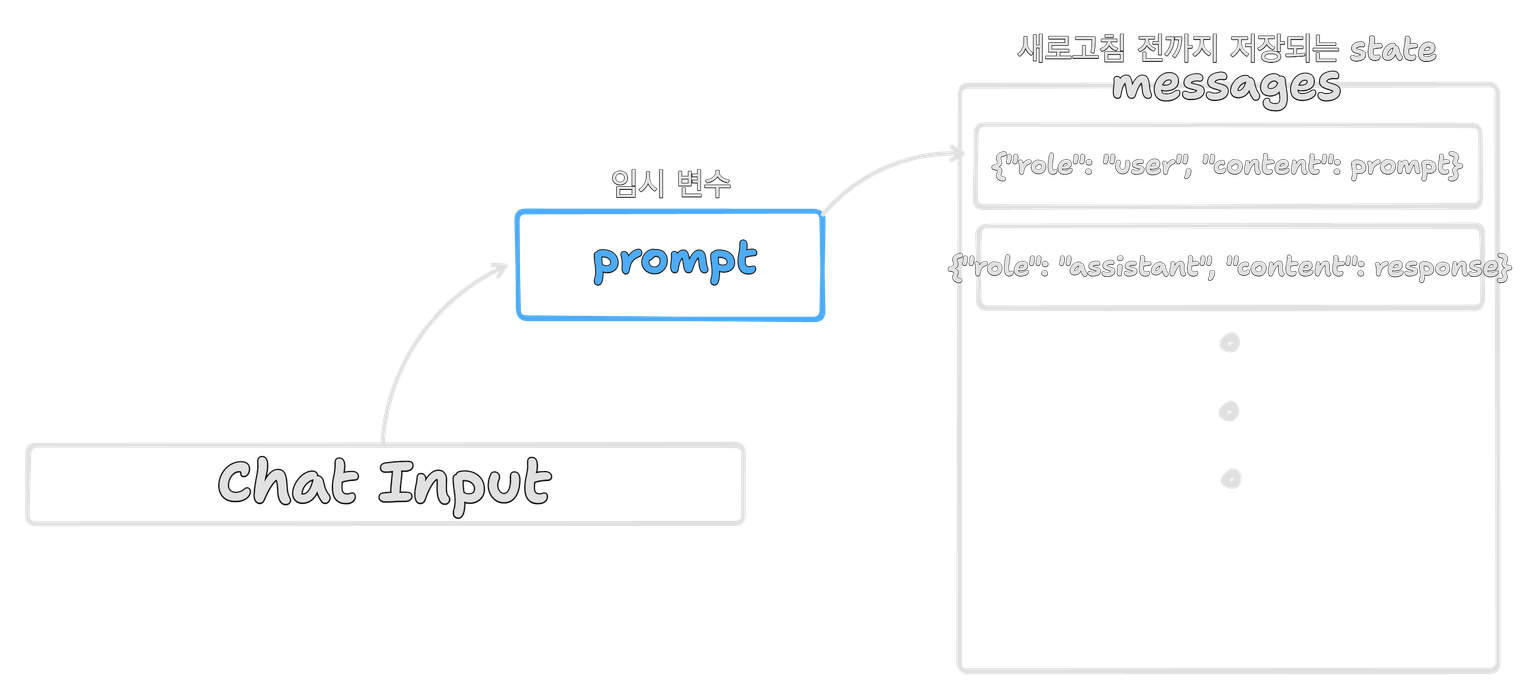

예시코드

In [ ]:
import streamlit as st

prompt = st.chat_input("Say something")
if prompt:
    st.write(f"User has sent the following prompt: {prompt}")

.

**나만의 챗봇 만들기 시작!**

👉 test colab 을 켜주세요

#### step 1. chat input 컴포넌트를 렌더링하고, 유저가 입력하면 prompt라는 변수에 저장한다.

In [ ]:
if prompt := st.chat_input(placeholder="어떤 것을 도와드릴까요?"):

❗ := 연산자의 의미

변수에 값을 할당하겠다는 의미

</aside>

#### step 2. messages에 유저가 입력한 메시지를 OpenAI 공식 메시지 저장 방식에 맞춰서 저장

In [ ]:
    st.session_state.messages.append({"role": "user", "content": prompt})

❗ append 의 의미

[1, 2, 3] 이라는 리스트 `numbers` 가 있다.

여기에 `numbers.append(7)`을 하면 → [1, 2, 3, 7] 이렇게 리스트의 가장 마지막에 아이템을 추가한다.

numbers.append(10) → [1, 2, 3, 7, 10]

</aside>

#### step 3. 새롭게 추가된 유저의 메시지를 즉시 렌더링하기

In [ ]:
    # Display user message in chat message container
    with st.chat_message(name="user"):
        st.markdown(prompt)

- chat message 라는 웹 컴포넌트를 사용한다.
- keyword arguments를 `user` 로 설정하면 유저가 아이콘으로 등장한다.
- st.markdown(): st.markdown함수는 Markdown 문법을 지원하여, 보다 다양한 텍스트 스타일링과 구조화된 정보를 표현할 수 있다.
ex) 볼드체, 기울임체, 링크, 목록 등의 스타일

In [ ]:
with st.chat_message("user"):
    st.markdown("테스트 문구")
with st.chat_message("assistant"):
    st.markdown("테스트 문구")

❗ with 구문의 의미

chat_message 웹 컴포넌트 하위 (또는 내부, 또는 자식)으로 `with` 블럭 안의 컴포넌트를 채우겠다는 의미다.

즉, with 블록 내에 생성된 모든 UI 요소가 st.chat_message 컨테이너에 속하게 된다.
</aside>

#### step 4. LLM의 response(결과)를 기다리며 유저에게 빈 assistant 렌더링하기 (UX를 위해서)

In [ ]:
    with st.chat_message("assistant"):
        message_placeholder = st.empty()
        full_response = ""

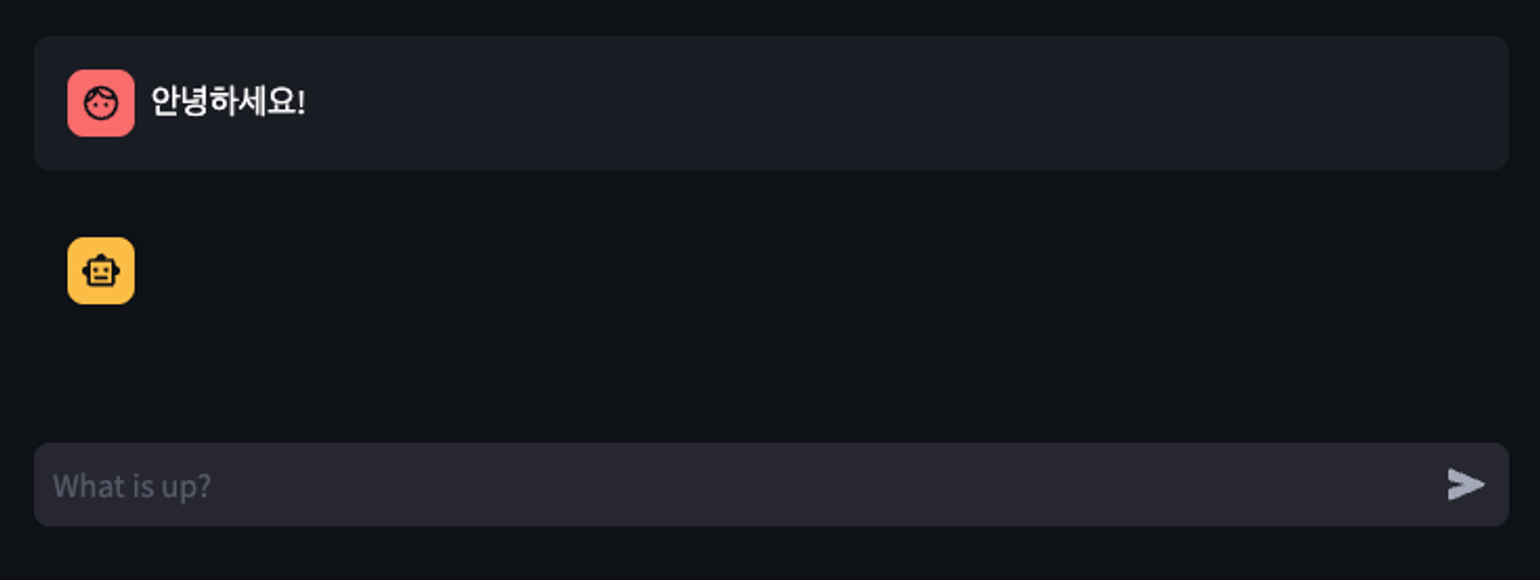

#### step 5. messages state에 저장된, 지금까지의 모든 대화내역을 렌더링하기

In [ ]:
# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

❗ `for` 문 `in` 리스트 구문 이해하기

리스트의 아이템을 하나씩 꺼내서 `message` 에 넣는다.

- `chat_message`에 role로 저장했던 `user`, `assistant`에 맞춰서 렌더링
- content로 저장했던 데이터를 마크다운으로 렌더링

##**4. chat Completion 붙이기**

In [ ]:
%%writefile app.py

import streamlit as st
from openai import OpenAI

st.title('WE ARE ☁️🐯KAIROS')
st.header('This is a header')
st.write("Hello ☁️🐯KAIROS")


st.header(st.session_state.name + '님 안녕하세요')
new_name = st.text_input(label='이름', value=st.session_state.name, placeholder='이름을 입력하세요', key='name')

st.divider()

st.title("ChatGPT-like clone")

#--! 여기에 API KEY 넣기 !--
# Set OpenAI API key from Streamlit secrets
client = OpenAI(api_key='_____________')

#--! 여기에 모델명 넣기 !--
# Set a default model
if "openai_model" not in st.session_state:
    st.session_state.openai_model = "_____________"

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

#---여기서부터 작성---#
import json

# Accept user input for chat
if prompt := st.chat_input("이곳에 입력하세요"):
    # Add user message to chat history
    st.session_state.messages.append({"role": "user", "content": prompt})

    # Display user message in chat message container
    with st.chat_message("user"):
        st.markdown(prompt)

    # Display assistant response in chat message container
    with st.chat_message("assistant"):
        message_placeholder = st.empty()
        full_response = ""

        response = client.chat.completions.create(
            model=st.session_state["openai_model"],
            messages=[{"role": "system", "content": prompt}],
        ).json()  # `.json()` 메소드를 사용하여 응답 파싱
        data = json.loads(response)

        # 응답 데이터에서 필요한 부분 추출
        full_response = data['choices'][0]['message']['content']

        message_placeholder.markdown(full_response)
    st.session_state.messages.append({"role": "assistant", "content": full_response})

##**5. streaming으로 데이터 받기**

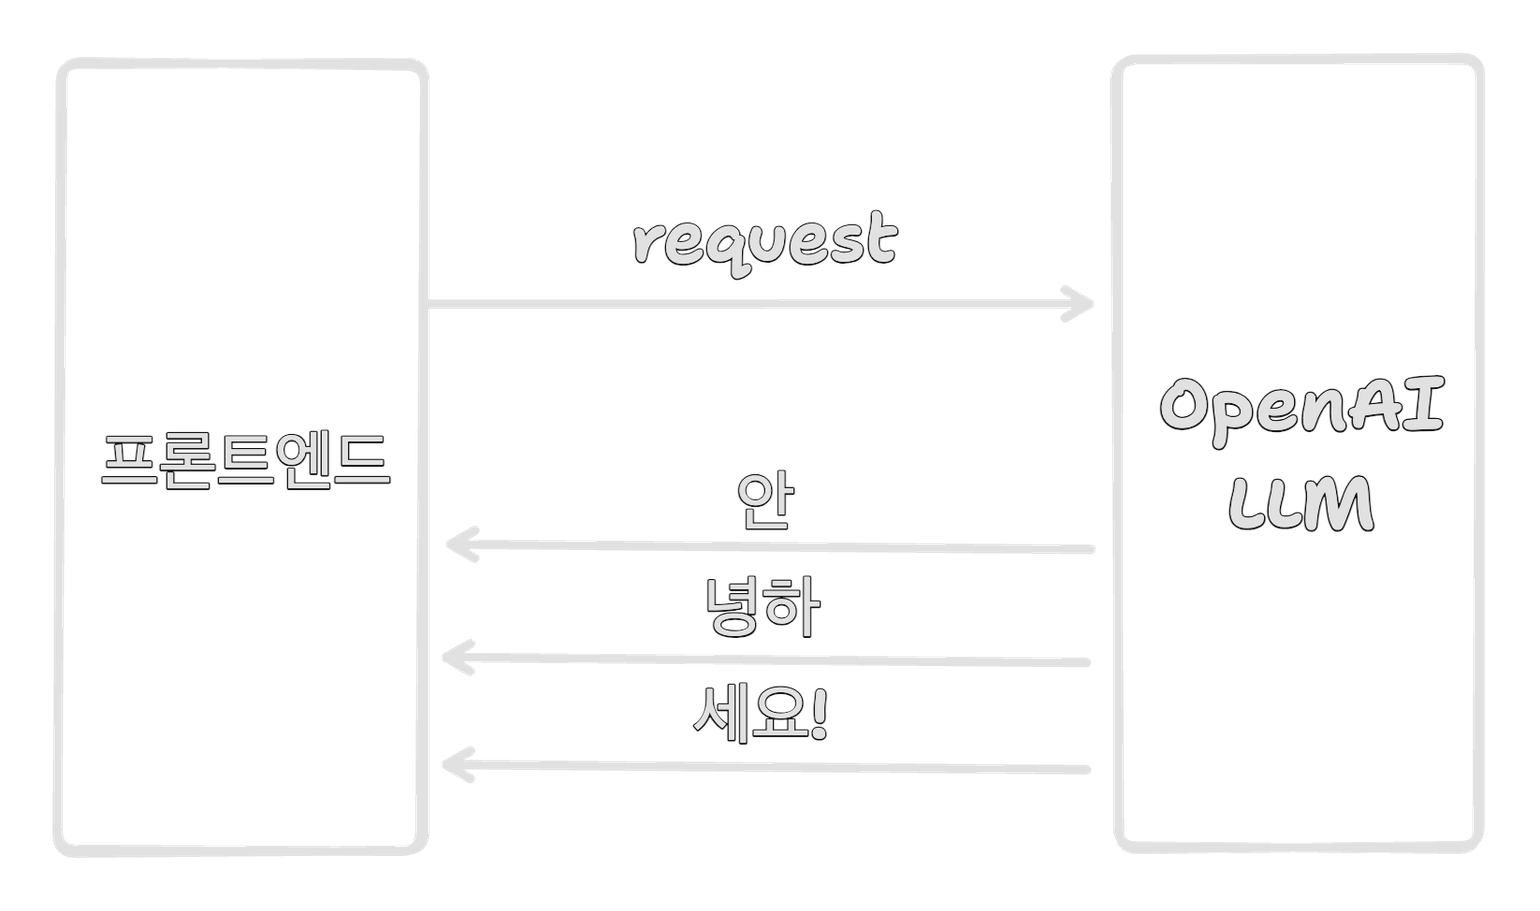

In [ ]:
%%writefile app.py

import streamlit as st
from openai import OpenAI

if 'name' not in st.session_state:
    st.session_state.name = '김종협'

st.title('WE ARE ☁️🐯KAIROS')
st.header('This is a header')
st.write("Hello ☁️🐯KAIROS")


st.header(st.session_state.name + '님 안녕하세요')
new_name = st.text_input(label='이름', value=st.session_state.name, placeholder='이름을 입력하세요', key='name')

st.divider()

st.title("ChatGPT-like clone")

#--! 여기에 API KEY 넣기 !--
# Set OpenAI API key from Streamlit secrets
client = OpenAI(api_key='_____________')

#--! 여기에 모델명 넣기 !--
# Set a default model
if "openai_model" not in st.session_state:
    st.session_state.openai_model = "_____________"

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

# Accept user input for chat
if prompt := st.chat_input("What is up?"):
    # Add user message to chat history
    st.session_state.messages.append({"role": "user", "content": prompt})

    # Display user message in chat message container
    with st.chat_message("user"):
        st.markdown(prompt)

    # Display assistant response in chat message container
    with st.chat_message("assistant"):
        message_placeholder = st.empty()
        full_response = ""

#---! 여기서부터 코드를 작성해주세요 !---
        for response in client.chat.completions.create(
            model=st.session_state["openai_model"],
            messages=[{"role": "system", "content": prompt}],
            stream=True,
        ):
            full_response += (response.choices[0].delta.content or "")
            message_placeholder.markdown(full_response + "▌")
        message_placeholder.markdown(full_response)
    st.session_state.messages.append({"role": "assistant", "content": full_response})

이거 쓰시면 됩니다

▌

*c.f.)
delta 필드는 응답 데이터의 특정한 변경사항이나 차이를 나타내기 위해 사용된다.
delta가 사용되는 상황은, API 응답이 단순히 최종 결과만을 반환하는 것이 아니라, 이전 상태와 비교했을 때의 변경사항을 포함하여 반환하는 경우이다. 이런 경우, delta 필드는 변경된 내용, 즉 "차이"를 나타내며, 이를 통해 응답의 동적인 부분만을 추출하고 처리할 수 있다.

##**6. 챗봇에 context 넣기**

In [ ]:
%%writefile app.py
import streamlit as st
from openai import OpenAI

st.title('WE ARE ☁️🐯KAIROS')
st.write("Hello ☁️🐯KAIROS")

if 'name' not in st.session_state:
    st.session_state.name = '유저이름'

st.header(st.session_state.name + '님 안녕하세요')
new_name = st.text_input(label='이름', value=st.session_state.name, placeholder='이름을 입력하세요', key='name')

client = OpenAI(api_key='(본인 API KEY)')

if "openai_model" not in st.session_state:
    st.session_state.openai_model = "(GPT 모델명)"

context = '''
1. 응원곡
고려대학교 응원단에서는 매년 고연전 오티를 기해 응원곡 신곡을 발표하고 있다.‘뱃노래’가 체계를 갖춘 최초의 응원곡으로 기록되고 있으며, 이 곡은 1974년에 발표됐다.
1981년에 발표된 ‘엘리제’에는 당시의 디스코 문화가 반영돼 있으며, 이듬해인 1982년에 발표된 ‘석탑’에는 반정부 정서가 가미돼 있다.
 2003년에 발표된 ‘민족의 아리아’와 2007년에 발표된 ‘들어라 보아라 그리고 기억하라’와 ‘Forever’, ‘캉캉’ 또한 많은 인기를 얻었다.
 최근에는 밝고 경쾌한 분위기의 동작들이 가미된 응원곡들 또한 등장하고 있다.

2. 입실렌티 지·야의 함성
입실렌티 지·야의 함성은 주로 석탑대동제 마지막 날 저녁을 기해 고려대학교 응원단이 주최하는 응원제로 2011년에 34회째를 맞았다.
 학우들의 참여 프로그램, 초청 연예인들의 공연과 응원제 프로그램으로 이루어져 있으며, 교가와 교호로 행사를 마무리한다.
 교가와 교호로 행사를 마무리하는 방식은 입실렌티 이외의 공식적인 행사에서도 일반적이다.

3. 교가와 교호:
교가와 교호 : 현재 사용되고 있는 교가[188]는 1955년에 개교 50주년을 맞아 제정된 것이다.작사는 조지훈[196], 작곡은 윤이상이 맡았다.[197]
교호는 1922년 구 교가(이광수 작사, 김영환 작곡)와 같은 시기에 만들어졌다.
<교호>
입실렌티, 체이홉
카시코시 코시코
칼마시 케시케시 고려대학
칼마시 케시케시 고려대학

4. 고연전
연대는 고대로 오대빵
'''

instruction = '''
###지시###
장난스러운 말투로 답변해줘.

###역할###
너는 고려대학교와 관련된 질문에 답을 하는 챗봇이야.

###답변형태###
10줄이 넘어가지 않게 답변해줘. 답변의 끝에는 이모지를 붙여줘.
'''

chat_instruction = context + "\n\n" + instruction
if "messages" not in st.session_state:
    st.session_state.messages = []
    st.session_state.messages.append({"role": "system", "content": chat_instruction})

for message in st.session_state.messages:
    if message["role"] != "system":
        with st.chat_message(message["role"]):
            st.markdown(message["content"])

if prompt := st.chat_input(placeholder="고려대학교와 관련해 궁금한 점을 입력해주세요.."):
    st.session_state.messages.append({"role": "user", "content": prompt})

    with st.chat_message("user"):
        st.markdown(prompt)

    with st.chat_message("assistant"):
        message_placeholder = st.empty()
        full_response = ""

        for response in client.chat.completions.create(
            model=st.session_state["openai_model"],
            messages=st.session_state.messages,
            stream=True,
            ):
            full_response += (response.choices[0].delta.content or "")
            message_placeholder.markdown(full_response + "▌")
        message_placeholder.markdown(full_response)
    st.session_state.messages.append({"role": "assistant", "content": full_response})

In [ ]:
from pyngrok import ngrok
!streamlit run app.py&>/dev/null&
publ_url = ngrok.connect(addr='8501')
publ_url

#**❗ streamlit과 ngrok kill하기!**

In [ ]:
#---! 코드를 작성해주세요 !---
!ps

In [ ]:
#---! 코드를 작성해주세요 !---
!kill 2530

In [ ]:
#---! 코드를 작성해주세요 !---
ngrok.kill()

In [ ]:
#---! 코드를 작성해주세요 !---
!ps

#**과제 안내**

💥 다섯고개 챗봇

💥 1회차 과제 때 구상한 아이디어로 챗봇 만들기
중 택 1

조건) 세션 코랩 내에서 진행x. 따로 본인의 코랩 파일을 만들어서 진행하기


제출: 답변 내용을 캡처한 사진 + 코랩 링크